In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.integrate as integrate
import time

Soient $X$ et $Y$ deux variables aléatoires indépendantes identiquement distribuées (i.i.d.) de loi exponentielle de paramètre 1.



   tout d'abord nous allons montrer que la loi conditionnelle de $X$ sachant $2Y > (1 - X)^2$ a pour densité :

   $f(x) = \frac{2}{\sqrt{2\pi}} \exp \left( -\frac{x^2}{2} \right) \mathbb{1}_{[0, +\infty[}(x)$

   _Démonstration :_

   En utilisant la méthode de la fonction muette, soit $f$ une fonction continue et bornée. Par définition, on a :

   $\mathbb{E}[f(X) | 2Y > (1 - X)^2] = \frac{1}{P(2Y > (1 - X)^2)} \mathbb{E}[f(X) \mathbb{1}_{2Y > (1 - X)^2}]$

   En appliquant le théorème de Fubini, il vient :

   $\mathbb{E}[f(X) \mathbb{1}_{2Y > (1 - X)^2}] = \int_0^{\infty} f(x) e^{-x} \left[ \int_{(1 - x)^2/2}^{\infty} e^{-y} \, dy \right] dx$

   En utilisant une intégration directe, on obtient :

   $\mathbb{E}[f(X) \mathbb{1}_{2Y > (1 - X)^2}] = e^{-1/2} \int_0^{\infty} f(x) e^{-x^2/2} \, dx$

   En choisissant $f(x) = 1$, cela nous donne :

   $P(2Y > (1 - X)^2) = \frac{\sqrt{2\pi}}{2} e^{-1/2}$

   Finalement, la densité conditionnelle de $X$ sachant $2Y > (1 - X)^2$ est :

   $f(x) = \frac{2}{\sqrt{2\pi}} e^{-x^2/2} \mathbb{1}_{[0, +\infty[}(x)$



   Soit $S$ une variable aléatoire de loi Bernoulli de paramètre $1/2$, indépendante du couple $(X, Y)$. Montrer que la loi conditionnelle de $(2S - 1)X$ sachant $2Y > (1 - X)^2$ suit une loi normale centrée réduite.

   _Démonstration :_

   De manière similaire à la première question, on utilise la méthode de la fonction muette pour obtenir :

   $\mathbb{E}\left[ f\left( (2S - 1)X \right) \middle| 2Y > (1 - X)^2 \right] = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) e^{-x^2/2} \, dx$

   Ce qui montre que la loi conditionnelle de $(2S - 1)X$ sachant $2Y > (1 - X)^2$ suit une loi normale centrée réduite $\mathcal{N}(0, 1)$.


On en déduit un algorithme de simulation de la loi $\mathcal{N}(0, 1)$ :

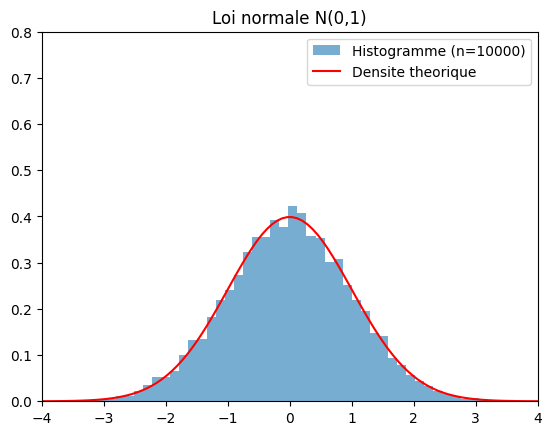

In [8]:
def simugaussienne():
    x=st.expon.rvs(size=2,scale=1)
    while (2*x[1]<=(1-x[0])**2):
        x=st.expon.rvs(size=2,scale=1)
    s=st.binom.rvs(size=1,n=1, p=0.5)
    return((2*s[0]-1)*x[0])

# simulation d’un vecteur de taille n
n=10000
res=[]
for i in range(n):
    res=res+[simugaussienne()]


#Histogramme
plt.figure()
plt.xlim(-4,4)
plt.ylim(0,0.8)
plt.hist(res,50,density=True, alpha=0.6,label=f'Histogramme (n={n})')
#Densite
absc=np.linspace(-4,4,100)
ordo=(np.pi*2)**(-.5)*np.exp(-absc**2/2)
plt.plot(absc,ordo,color='r', label="Densite theorique")
plt.legend()
plt.title("Loi normale N(0,1)")
plt.show()

Soient $f$ et $g : \mathbb{R} \to \mathbb{R}$ des densités, et $h$ la fonction définie par :

$$
h(x) = \frac{\max(f(x), g(x))}{\int_{\mathbb{R}} \max(f(t), g(t)) dt}
$$


   On veut simuler une variable aléatoire $Z$ de densité $h$ suivant une méthode d'acceptation/rejet. On considère une suite de variables i.i.d. $(X_n)_{n \in \mathbb{N}}$ de loi de densité $f$, et une autre suite $(Y_n)_{n \in \mathbb{N}}$ de loi de densité $g$. On considère également deux autres suites de variables $(U_n)_{n \in \mathbb{N}}$ et $(V_n)_{n \in \mathbb{N}}$ de loi uniforme sur $[0, 1]$. Ces quatre suites sont supposées indépendantes entre elles. On pose alors

   $$
   T = \min \{n \in \mathbb{N}^*, U_n f(X_n) \leq g(X_n) \text{ ou } V_n g(Y_n) \leq f(Y_n)\}
   $$
   
   et
   
   $$
   Z =
   \begin{cases}
   Y_T & \text{si } U_T f(X_T) \leq g(X_T) \\
   X_T & \text{si } V_T g(Y_T) \leq f(Y_T) \text{ et } U_T f(X_T) > g(X_T)
   \end{cases}
   $$

   $Z$ est de loi de densité $h$.

   _Démonstration :_

   Pour toute fonction $\ell$ continue et bornée, on a :

   $$
   \mathbb{E} [ \ell(Z) ] = \sum_{n \geq 1} \mathbb{E} \left[ \left( \ell(Y_n) \mathbb{1}_{U_n f(X_n) \leq g(X_n)} + \ell(X_n) \mathbb{1}_{V_n g(Y_n) \leq f(Y_n) \text{ et } U_n f(X_n) > g(X_n)} \right) \mathbb{1}_{T=n} \right]
   $$

   Par indépendance des variables et des lois de celles-ci, on obtient :

   $$
   \mathbb{E} [ \ell(Z) ] = \sum_{n \geq 1} \left( \mathbb{E} [ \ell(Y_1) ] P(U_1 f(X_1) \leq g(X_1)) + \mathbb{E} [ \ell(X_1) \mathbb{1}_{U_1 f(X_1) > g(X_1)} ] P(V_1 g(Y_1) \leq f(Y_1)) \right)
   $$

   $$
   \times \left( P(U_1 f(X_1) > g(X_1)) P(V_1 g(Y_1) > f(Y_1)) \right)^{n-1}
   $$

   En utilisant le théorème de Fubini, il vient :

   $$
   \mathbb{E} [ \ell(X_1) \mathbb{1}_{U_1 f(X_1) > g(X_1)} ] = \int_{\mathbb{R}} \int_0^1 \ell(x) \mathbb{1}_{u f(x) > g(x)} f(x) du dx = \int_{\mathbb{R}} \ell(x) f(x) \mathbb{1}_{f(x) > 0} \int_0^{\min(1, g(x)/f(x))} du dx
   $$

   Ce qui donne :

   $$
   \mathbb{E} [ \ell(Z) ] = m \int_{\mathbb{R}} \ell(x) g(x) dx + m \int_{\mathbb{R}} \ell(x) (f(x) - \min(f(x), g(x))) dx \sum_{n \geq 1} (1 - m)^{2(n-1)}
   $$

   où $m = \int_{\mathbb{R}} \min(f(x), g(x)) dx$.

   En revenant à l'égalité précédente, on obtient finalement :

   $$
   \mathbb{E} [ \ell(Z) ] = \frac{m}{1 - (1 - m)^2} \int_{\mathbb{R}} \ell(x) (g(x) + f(x) - \min(f(x), g(x))) dx
   $$

Or,

$$
\frac{m}{1 - (1 - m)^2} = \frac{1}{2 - m} = \frac{1}{\int_{\mathbb{R}} \left( g(x) + f(x) - \min(f(x), g(x)) \right) dx}
$$

Il suffit maintenant de remarquer que $g(x) + f(x) - \min(f(x), g(x)) = \max(g(x), f(x))$ pour voir que $Z$ est bien de densité $h$.



On suppose ici que $f$ est la densité de la loi $N(0, 1)$ et $g$ la densité de la loi $N(3/2, 1)$.

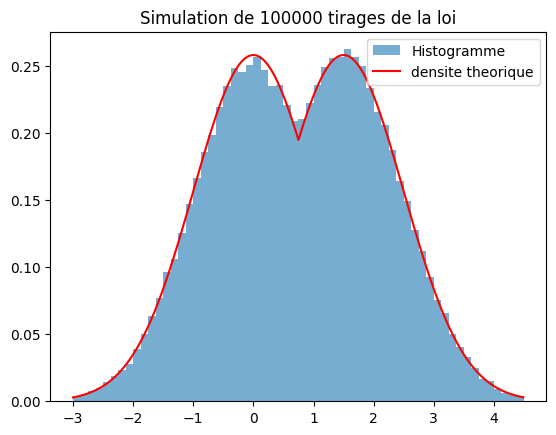

In [9]:
import warnings
warnings.filterwarnings('ignore')
nbiter=int(1E5)
loc1=0
loc2=3/2
sig1=1
sig2=1

def simuh():
    x=st.norm.rvs(size=1,loc=loc1,scale=sig1)
    y=st.norm.rvs(size=1,loc=loc2,scale=sig2)
    u=st.uniform.rvs(size=2)
    while ((u[0]*st.norm.pdf(x,loc=loc1,scale=sig1)>st.norm.pdf(x,loc=loc2,scale=sig2))&(u[1]*st.norm.pdf(y,loc=loc2,scale=sig2)>st.norm.pdf(y,loc=loc1,scale=sig1))):
        x=st.norm.rvs(size=1,loc=loc1,scale=sig1)
        y=st.norm.rvs(size=1,loc=loc2,scale=sig2)
        u=st.uniform.rvs(size=2)
    z=x
    if (u[0]*st.norm.pdf(x,loc=loc1,scale=sig1)<=st.norm.pdf(x,loc=loc2,scale=sig2)):
        z=y
    return(z)


r=np.zeros(nbiter)
for i in range(nbiter):
    r[i]=simuh()

def h(x,loc1=loc1,loc2=loc2,sig1=sig1,sig2=sig2):
    y=np.maximum(st.norm.pdf(x,loc=loc1,scale=sig1),st.norm.pdf(x,loc=loc2,scale=sig2))
    return y




absc=np.arange(loc1-3*sig1,loc2+3*sig2,.01)
I=integrate.quad(h, loc1-10*sig1,loc2+10*sig2)	#Valeur de reference
ordo=h(absc)/I[0]

# histogramme pour la loi de x
plt.figure()
plt.hist(r,bins=np.linspace(loc1-3*sig1,loc2+3*sig2,61),density=True,alpha=0.6,label="Histogramme") #histogramme
plt.plot(absc,ordo,color='r',label='densite theorique')
plt.title(f'Simulation de {nbiter} tirages de la loi')
plt.legend()
plt.show()



Autre exemple avec $f$ la densité de la loi $N(0, 1)$ et $g$ la densité de la loi $N(3/2, 1/5)$.

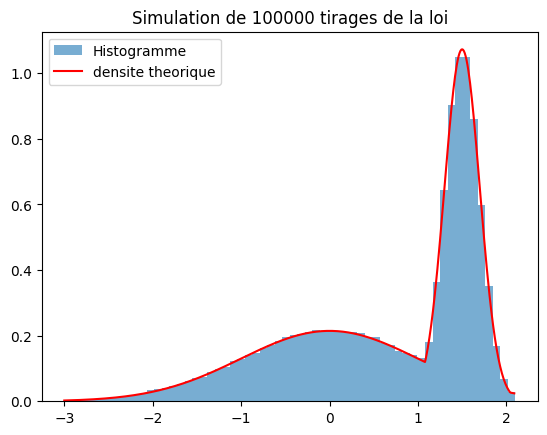

In [14]:
import warnings
warnings.filterwarnings('ignore')
nbiter=int(1E5)
loc1=0
loc2=3/2
sig1=1
sig2=0.2


r=np.zeros(nbiter)
for i in range(nbiter):
    r[i]=simuh()

absc=np.arange(loc1-3*sig1,loc2+3*sig2,.01)
I=integrate.quad(h, loc1-10*sig1,loc2+10*sig2)
ordo=h(absc)/I[0]


plt.figure()
plt.hist(r,bins=np.linspace(loc1-3*sig1,loc2+3*sig2,61),density=True,alpha=0.6,label="Histogramme")
plt.plot(absc,ordo,color='r',label='densite theorique')
plt.title(f'Simulation de {nbiter} tirages de la loi')
plt.legend()
plt.show()